This is the Built-in Python executer For the paper "**SIGMA: A Dataset for Text-to-Code Semantic Parsing with Statistical Analysis**"

Please run all the following codes.

Import imporant Python libraries


*   Json: Used for parsing Json from strings or files into a Python dictionary or list
*   Pandas: Provides fast, expressive, and flexible data structures and analysis.
* Numpy: A wide range of mathematical operations can be performed on arrays using this library.
* Matplotlib: Visualization library that creates static, animated, and interactive visualizations.
* Seaborn: A Python library for creating statistical graphics. Based on matplotlib and closely integrated with pandas.
* Scipy: A library of scientific and technical computing that depands on the Numbay Library.
* Sklearn: Data analysis library used for a variety of machine learning tasks.



---





In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as matplt
from scipy.stats import trim_mean
from scipy import stats
from sklearn.utils import resample
from sklearn import preprocessing



---



Code for reading the uploaded tables and navigate to appropriate main-kind functions



---



In [7]:
def return_results(MainKind, SubKind, Table, Columns, ExtraParam):
  
  Path = "/content/" + Table + ".csv"
  Table = pd.read_csv(Path , encoding="utf-16")
  if len(ExtraParam) != len(Columns):
    print("checkExtraParam")

  #MainKind: One of four :Distribution, Plot, Query, numeric
  #SubKind: one or more SubKind for example SubKind = [mean, std, var]
  #
  #         Distribution :
  #         Plot :
  #         Query :
  #         numeric :
  #
  #
  # Table: Only one table
  # Columns: array of arrays each array correspond to thae same index subKind for the above example columns = [[age],[age],[salary]]
  # ExtraParam: array of arrays each array correspond to thae same index Columns
  
  if MainKind == "distribution":
    result = return_distribution_results(SubKind, Table, Columns, ExtraParam)
  elif MainKind == "plot":
    result = return_plot_results(SubKind, Table, Columns, ExtraParam)
  elif MainKind == "query":
    result = return_query_results(SubKind, Table, Columns, ExtraParam)
  elif MainKind == "numeric":
    result = return_numeric_results(SubKind, Table, Columns, ExtraParam)





  return result



---



Code to execute all Distribution operations Like (normal, exponential ... etc.)



---



In [3]:
## MainKind: Distribution 10 Types


def normal_results(Table, Columns, ExtraParam, index):
  # Take one column
  np.random.seed(0)
  x = Table[Columns[index][0]]
  result = sns.displot(x, kind='kde')
  return result

def standard_normal_results(Table, Columns, ExtraParam, index):
  # Take one column
  np.random.seed(0)
  x = Table[Columns[index][0]]
  x = preprocessing.scale(x)
  result = sns.displot(x, kind='kde')

  return result

def long_tailed_results(Table, Columns, ExtraParam, index):
  # Take one column
  long_tailed_data = Table[Columns[index][0]]
  long_tailed_data = np.diff(np.log(long_tailed_data[long_tailed_data>0]))
  fig, ax = plt.subplots(figsize=(4, 4))
  stats.probplot(long_tailed_data, plot=ax)
  plt.tight_layout()
  result = plt
  return result

def binomial_results(Table, Columns, ExtraParam, index):
  ##### Take one column
  data_binom = Table[Columns[index][0]]
  data_binom = data_binom.astype('category')
  data_binom = pd.Categorical(Table[Columns[index][0]])
  ax = sns.distplot(data_binom,
                  kde=False)
  result = ax.set(xlabel='Binomial', ylabel='Frequency')
  return result

def poisson_results(Table, Columns, ExtraParam, index):
  # Take one column
  mean= Table[Columns[index][0]].mean()
  size= Table[Columns[index][0]].size
  x = stats.poisson.rvs(mu=mean, size=size)
  #create plot of Poisson distribution
  result = plt.hist(x, density=True, edgecolor='black')
  return result

def exponential_results(Table, Columns, ExtraParam, index):
  # Take one column
  x = Table[Columns[index][0]]
  y = stats.expon.pdf(x)
  result = sns.displot(y, kind='kde')
  return result

def weibull_results(Table, Columns, ExtraParam, index):
  # Take one column
  x = Table[Columns[index][0]]
  y = stats.weibull_min.pdf(x, ExtraParam[index][2])
  result = sns.displot(y, kind='kde')
  return result

def chi_square_results(Table, Columns, ExtraParam, index):
  # Take one column
  x = Table[Columns[index][0]]
  y = stats.chi2.pdf(x , df=ExtraParam[index][2])
  result = sns.displot(y, kind='kde')
  return result

def t_results(Table, Columns, ExtraParam, index):
  # Take one column
  x = Table[Columns[index][0]]
  y = stats.t.pdf(x , df=ExtraParam[index][2])
  result = sns.displot(y, kind='kde')
  return result

def f_results(Table, Columns, ExtraParam, index):
  # Take one column
  x = Table[Columns[index][0]]
  y = stats.f.pdf(x , dfn=ExtraParam[index][2],dfd=ExtraParam[index][5])
  result = sns.displot(y, kind='kde')
  return result


def return_distribution_results(SubKind, Table, Columns, ExtraParam):
  # we have 11 data distribution type
  index = 0
  final_result = []
  for kind in SubKind:
    if kind == "normal":
      result = normal_results(Table, Columns, ExtraParam, index)
    elif kind == "standard_normal":
      result = standard_normal_results(Table, Columns, ExtraParam, index)
    elif kind == "long_tailed":
      result = long_tailed_results(Table, Columns, ExtraParam, index)
    elif kind == "binomial":
      result = binomial_results(Table, Columns, ExtraParam, index)
    elif kind == "poisson":
      result = poisson_results(Table, Columns, ExtraParam, index)
    elif kind == "exponential":
      result = exponential_results(Table, Columns, ExtraParam, index)
    elif kind == "weibull":
      result = weibull_results(Table, Columns, ExtraParam, index)
    elif kind == "chi_square":
      result = chi_square_results(Table, Columns, ExtraParam, index)
    elif kind == "t":
      result = t_results(Table, Columns, ExtraParam, index)
    elif kind == "f":
      result = f_results(Table, Columns, ExtraParam, index)
    index = index + 1
    final_result.append(kind)
    final_result.append(result)
  

  return result




---



Code to execute all numeric operations Like (mean, median ... etc.)



---



In [4]:
## MainKind: numeric 21 Types


def mean_results(Table, Columns, ExtraParam, index):
  # Calculate the mean
  # take one column
  result = Table[Columns[index][0]].mean()
  return result

def w_mean_results(Table, Columns, ExtraParam, index):
  # Calculate the weighted mean
  # take two columns
  result = np.average(Table[Columns[index][0]], weights=Table[Columns[index][1]])
  return result

def t_mean_results(Table, Columns, ExtraParam, index):
  # Calculate the trimmed mean
  # take one column with value
  result = trim_mean(Table[Columns[index][0]], ExtraParam[index][2])
  return result

def mean_ad_results(Table, Columns, ExtraParam, index):
  # Calculate the mean absolute deviation
  # take one column
  result = Table[Columns[index][0]].mad()
  return result

def median_results(Table, Columns, ExtraParam, index):
  # Calculate the median
  # take one column
  result = Table[Columns[index][0]].median()
  return result

def w_median_results(Table, Columns, ExtraParam, index):
    # Calculate weighted median
    # take two columns
    data, weights = np.array(Table[Columns[index][0]]).squeeze(), np.array(Table[Columns[index][1]]).squeeze()
    s_data, s_weights = map(np.array, zip(*sorted(zip(data, weights))))
    midpoint = 0.5 * sum(s_weights)
    if any(weights > midpoint):
        w_median = (data[weights == np.max(weights)])[0]
    else:
        cs_weights = np.cumsum(s_weights)
        idx = np.where(cs_weights <= midpoint)[0][-1]
        if cs_weights[idx] == midpoint:
            w_median = np.mean(s_data[idx:idx+2])
        else:
            w_median = s_data[idx+1]
    result = w_median
    return result

def median_ad_results(Table, Columns, ExtraParam, index):
  # Calculate the median absolute deviation
  # take one column
  result = stats.median_abs_deviation(Table[Columns[index][0]])
  return result

def outlier_results(Table, Columns, ExtraParam, index):
  # find the outlier data points
  # take one column
  column = Table[Columns[index][0]]
  q1, q3= np.percentile(column,[25,75])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr)
  upper_bound = q3 +(1.5 * iqr)
  outlier = []
  for point in column:
    if point < lower_bound:
      outlier.append(point)
    elif point > upper_bound:
      outlier.append(point)
  result = outlier

  return result

def std_results(Table, Columns, ExtraParam, index):
  # Calculate the standard deviation
  # take one column
  result = Table[Columns[index][0]].std()
  return result

def var_results(Table, Columns, ExtraParam, index):
  # Calculate the variance
  # take one column
  result = Table[Columns[index][0]].var()
  return result

def range_results(Table, Columns, ExtraParam, index):
  # Calculate the range
  # take one column
  max = Table[Columns[index][0]].max()
  min = Table[Columns[index][0]].min()
  result = max - min 
  return result

def iqr_results(Table, Columns, ExtraParam, index):
  # find the iqr
  # take one column
  column = Table[Columns[index][0]]
  q1, q3= np.percentile(column,[25,75])
  iqr = q3 - q1
  result = iqr
  return result

def frequency_table_results(Table, Columns, ExtraParam, index):
  # get the frequency table
  # take one column
  column = Table[Columns[index][0]]
  result = column.value_counts()
  return result

def mode_results(Table, Columns, ExtraParam, index):
  # Calculate the mode
  # take one column
  result = Table[Columns[index][0]].mode()
  return result

def standard_error_results(Table, Columns, ExtraParam, index):
  # Calculate the standard error
  # take one column
  column = Table[Columns[index][0]]
  result = stats.sem(column)
  return result

def percentile_results(Table, Columns, ExtraParam, index):
  # find the value in specific percentile
  # take one column with value
  column = Table[Columns[index][0]]
  percent = ExtraParam[index][2]
  result = np.percentile(column, percent)
  return result

def corr_matrix_results(Table, Columns, ExtraParam, index):
  # find the correlation matrix
  # take 2 to 4 columns
  colCount = len(Columns[index])

  if colCount == 2:
    result = np.corrcoef(Table[Columns[index][0]], Table[Columns[index][1]])  
  elif colCount == 3:
    dataframe = pd.DataFrame(Table, columns=[Columns[index][0], Columns[index][1], Columns[index][2]])
    result = dataframe.corr()
  elif colCount == 4:
    dataframe = pd.DataFrame(Table, columns=[Columns[index][0], Columns[index][1], Columns[index][2], Columns[index][3]])
    result = dataframe.corr()

  return result

def corr_coff_results(Table, Columns, ExtraParam, index):
  # find the correlation coefficients
  # take 2 columns
  result = np.corrcoef(Table[Columns[index][0]], Table[Columns[index][1]])
  return result

def contingency_table_results(Table, Columns, ExtraParam, index):
  # find the contingency table
  # take 2 to 3 columns
  colCount = len(Columns[index])
  if colCount == 2:
      result = pd.crosstab(Table[Columns[index][0]],Table[Columns[index][1]], margins = False)
  if colCount == 3:
      result = pd.crosstab([Table[Columns[index][0]], Table[Columns[index][1]]],Table[Columns[index][2]], margins = False)
  return result

def size_results(Table, Columns, ExtraParam, index):
  # Get the number of rows of specific column
  # take one column
  result = Table[Columns[index][0]].size
  return result

def ci_results(Table, Columns, ExtraParam, index):
  # Get the confidence interval
  # Take one column with value
  result = stats.t.interval(alpha=ExtraParam[index][2], df=len(Table[Columns[index][0]])-1, loc=np.mean(Table[Columns[index][0]]), scale=stats.sem(Table[Columns[index][0]]))

  return result


def return_numeric_results(SubKind, Table, Columns, ExtraParam):
  # we have 21 numeric types
  index = 0 
  finalResult = []
  for kind in SubKind:  
    if kind == "mean":
      result = mean_results(Table, Columns, ExtraParam, index)
    elif kind == "w_mean":
      result = w_mean_results(Table, Columns, ExtraParam, index)
    elif kind == "t_mean":
      result = t_mean_results(Table, Columns, ExtraParam, index)
    elif kind == "mean_ad":
      result = mean_ad_results(Table, Columns, ExtraParam, index)
    elif kind == "median":
      result = median_results(Table, Columns, ExtraParam, index)
    elif kind == "w_median":
      result = w_median_results(Table, Columns, ExtraParam, index)
    elif kind == "median_ad":
      result = median_ad_results(Table, Columns, ExtraParam, index)
    elif kind == "outlier":
      result = outlier_results(Table, Columns, ExtraParam, index)
    elif kind == "std":
      result = std_results(Table, Columns, ExtraParam, index)
    elif kind == "var":
      result = var_results(Table, Columns, ExtraParam, index)
    elif kind == "range":
      result = range_results(Table, Columns, ExtraParam, index)
    elif kind == "iqr":
      result = iqr_results(Table, Columns, ExtraParam, index)
    elif kind == "frequency_table":
      result = frequency_table_results(Table, Columns, ExtraParam, index)
    elif kind == "mode":
      result = mode_results(Table, Columns, ExtraParam, index)
    elif kind == "standard_error":
      result = standard_error_results(Table, Columns, ExtraParam, index)
    elif kind == "percentile":
      result = percentile_results(Table, Columns, ExtraParam, index)
    elif kind == "corr_matrix":
      result = corr_matrix_results(Table, Columns, ExtraParam, index)
    elif kind == "corr_coff":
      result = corr_coff_results(Table, Columns, ExtraParam, index)
    elif kind == "contingency_table":
      result = contingency_table_results(Table, Columns, ExtraParam, index)
    elif kind == "size":
      result = size_results(Table, Columns, ExtraParam, index)
    elif kind == "ci":
      result = ci_results(Table, Columns, ExtraParam, index)
    index = index + 1
    finalResult.append("value =")
    finalResult.append(result)
  

  return finalResult




---



Code to execute all plot operations Like (histogram, box ... etc.)



---



In [6]:

## MainKind: Plot 9 Types

def hist_plot(Table, Columns, ExtraParam, index): 
  # Histogram Plot
  # Take one column
  plot = sns.displot(Table, x=Columns[index][0], kind="hist")
  return plot

def box_plot(Table, Columns, ExtraParam, index):
  # box Plot
  # Take one column
  plot = sns.catplot(data= Table, x= Columns[index][0], kind="box")
  return plot

def kde_plot(Table, Columns, ExtraParam, index):
  # density Plot
  # Take one column
  plot = sns.displot(Table, x=Columns[index][0], kind="kde")
  return plot

def pie_plot(Table, Columns, ExtraParam, index):
  # pie Plot
  # Take two columns the first for groupByCol second is weights
  groupByCol = Columns[index][0]
  weights = Columns[index][1]
  #plot = Table.plot.pie(y=Columns[index][0], figsize=(5, 5))
  plot = Table.groupby([groupByCol]).sum().plot(kind='pie', y=weights)
  return plot

def bar_plot(Table, Columns, ExtraParam, index):
  # bar Plot
  # Take one column
  plot = sns.catplot(data= Table, x= Columns[index][0], y= Columns[index][1], kind="bar")
  plot.set_xticklabels(rotation=45)
  return plot

def scatter_plot(Table, Columns, ExtraParam, index):
  # scatter Plot
  # Take 2 to 4 columns
  countCol = len(Columns[index])
  if countCol == 2:
      plot = sns.relplot(data=Table, x=Columns[index][0], y=Columns[index][1], kind="scatter")
  elif countCol == 3:
      plot = sns.relplot(data=Table, x=Columns[index][0], y=Columns[index][1], hue=Columns[index][2], kind="scatter")
  elif countCol == 4:
      plot = sns.relplot(data=Table, x=Columns[index][0], y=Columns[index][1], hue=Columns[index][2], style=Columns[index][3], kind="scatter")
  return plot

def hex_plot(Table, Columns, ExtraParam, index):
  # hexbin Plot
  # Take two columns
  sns.set_theme(style="ticks")
  rs = np.random.RandomState(11)
  x = Table[Columns[index][0]]
  y = Table[Columns[index][1]]
  plot = sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
  return plot

def contour_plot(Table, Columns, ExtraParam, index):
  # contour Plot
  # Take two columns
  x = Table[Columns[index][0]]
  y = Table[Columns[index][1]]
  plot = sns.kdeplot(x=x, y=y, cmap="Blues", shade=True, thresh=0)
  return plot

def violin_plot(Table, Columns, ExtraParam, index):
  # violin Plot
  # Take one column
  plot = sns.catplot(data= Table, x= Columns[index][0], kind="violin")
  return plot


def return_plot_results(SubKind, Table, Columns, ExtraParam):
  # we have 9 plot (visualization) type
  index = 0 
  finalResult = []
  for kind in SubKind: 
    if kind == "hist":
      plot = hist_plot(Table, Columns, ExtraParam, index)
    elif kind == "box":
      plot = box_plot(Table, Columns, ExtraParam, index)
    elif kind == "kde":
      plot = kde_plot(Table, Columns, ExtraParam, index)
    elif kind == "pie":
      plot = pie_plot(Table, Columns, ExtraParam, index)
    elif kind == "bar":
      plot = bar_plot(Table, Columns, ExtraParam, index)
    elif kind == "scatter":
      plot = scatter_plot(Table, Columns, ExtraParam, index)
    elif kind == "hex":
      plot = hex_plot(Table, Columns, ExtraParam, index)
    elif kind == "contour":
      plot = contour_plot(Table, Columns, ExtraParam, index)
    elif kind == "violin":
      plot = violin_plot(Table, Columns, ExtraParam, index)
    finalResult.append(kind)
    finalResult.append(plot)
  

  return plot




---



Code to execute all query operations Like (select, where ... etc.)



---



In [5]:
## MainKind: Query 4 Types


def select_query(SubKind, Table, Columns, ExtraParam, index):
  # get 1 to 4 columns from the dataframe, * means all the columns

  countCol = len(Columns[index])

  if countCol == 1:
     if Columns[index][0] == '*':
        queryValues = Table
     else:
        col1 = Columns[index][0]
        queryValues = Table[[col1]]
  elif countCol == 2:
     col1 = Columns[index][0]
     col2 = Columns[index][1]
     queryValues = Table[[col1, col2]]  
  elif countCol == 3:
     col1 = Columns[index][0]
     col2 = Columns[index][1]
     col3 = Columns[index][2]
     queryValues = Table[[col1, col2, col3]]  
  elif countCol == 4:
     col1 = Columns[index][0]
     col2 = Columns[index][1]
     col3 = Columns[index][2]
     col4 = Columns[index][3]
     queryValues = Table[[col1, col2, col3, col4]] 

  return queryValues


def where_query(SubKind, Table, Columns, ExtraParam, index):
  # get 1 column and conditions from the dataframe. 
  countCol = len(Columns[index])
  if  countCol == 1:
      col1 = Columns[index][0]
      operator = ExtraParam[index][1]
      value = ExtraParam[index][2]
      if operator == "=":
          queryValues = Table[(Table[col1] == value)]
      elif operator == ">":
          queryValues = Table[(Table[col1] > value)]
      elif operator == "<":
          queryValues = Table[(Table[col1] < value)]
      elif operator == ">=":
          queryValues = Table[(Table[col1] >= value)]
      elif operator == "<=":
          queryValues = Table[(Table[col1] <= value)]
      elif operator == "!=":
          queryValues = Table[(Table[col1] != value)]

  return queryValues


def groupby_query(SubKind, Table, Columns, ExtraParam, index):
  # group by 1 to 2 columns.
  countCol = len(Columns[index])
  agg = ExtraParam[index][2]
  if countCol == 1:
    if agg == "min":
        queryValues = Table.groupby(Columns[index][0]).min()
    elif agg == "max":
      queryValues = Table.groupby(Columns[index][0]).max()
    elif agg == "count":
      queryValues = Table.groupby(Columns[index][0]).count()
    elif agg == "sum":
      queryValues = Table.groupby(Columns[index][0]).sum()
  return queryValues

def orderby_query(SubKind, Table, Columns, ExtraParam, index):
  # order by 1 column.
  orderType = ExtraParam[index][2]
  if orderType == "desc":
      queryValues = Table.sort_values(by=Columns[index][0], ascending=False)
  elif orderType == "asc":
      queryValues = Table.sort_values(by=Columns[index][0], ascending=True)
  return queryValues


def return_query_results(SubKind, Table, Columns, ExtraParam):
  # we have 4 query type

  # determine indexes
  orderby_index = -1
  where_index = -1
  groupby_index = -1
  select_index = -1
  index = 0
  for item in SubKind:
    if item == "orderby":
      orderby_index = index
    if item == "where":
      where_index = index
    if item == "groupby":
      groupby_index = index
    if item == "select":
      select_index = index
    index = index + 1


  if "orderby" in SubKind:
    Table = orderby_query(SubKind, Table, Columns, ExtraParam, orderby_index)
  if "where" in SubKind:
    Table = where_query(SubKind, Table, Columns, ExtraParam, where_index)
  if "groupby" in SubKind:
    Table = groupby_query(SubKind, Table, Columns, ExtraParam, groupby_index)
  if "select" in SubKind:
    queryValues = select_query(SubKind, Table, Columns, ExtraParam, select_index)
  index = index + 1
 

  return queryValues







---


 **After you run all previous codes, and uploaded your csv files, you can use the below code to view the results.**



---



{'function': <seaborn.axisgrid.FacetGrid object at 0x7f12ac47c580>}


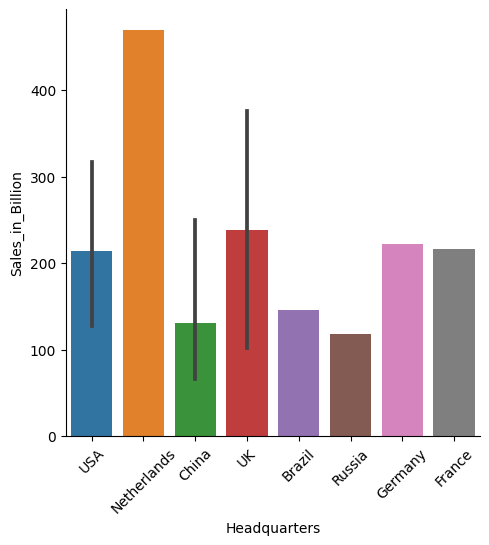

In [ ]:
## MAIN ##
# please if you have CSV table file, upload it to this Colab file.
# Follow the same way as the example below.

#results = {"function": return_results("plot",                                   # MainKind
#                                      ['bar'],                                  # subKind
#                                      "company",                                # Table
#                                      [['Headquarters'],['Sales_in_Billion']],  # Columns
#                                      [[],[]])}                                 # ExtraParam

results = {"function": return_results("plot", ["bar"], "company", [['Headquarters','Sales_in_Billion']], [[]]  )} 
print(results)

